In [1]:
#!/usr/bin/env python3

"""
	File name: NDD.py
	Python Version: 3.6

		Newton's Divided-Difference Polynomial Interpolation

	L.J. Brown
	Fall 2018
"""

# internal library
import logging
from functools import reduce

# external library
import numpy as np

# initilize logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
def divided_diffrence_coeffs(xs, ys, output=True):
    """
        Given n datapoints construct and interpolating polynomial of degree n-1,

            Pn(x) = b0 + b1(x - x0) + b2(x - x0)(x - x1) + ... + bn-1(x - x0)...(x - xn-2)

        Use Newtons Divded Diffrence Method, and return the coefficients, 

            bs = b0, b1, ..., bn-1

        -----------
        P3 example: (given 4 datapoints)
        -----------

            -------
            |xs|ys|
            -------		(b0)
                        /
            x0	y0 = [y0]		  (b1)
                                  /
                            [y0,y1]				 (b2)
                                                 /
            x1	y1 = [y1]				[y0,y1,y2]				(b3)
                                                                /
                            [y1,y2]					[y0,y1,y2,y3]

            x2	y2 = [y2]				[y1,y2,y3]

                            [y2,y3]

            x3	y3 = [y3]


        Code Structure:

            M ~ nxn Upper triangular matrix to store 
                intermediate divided diffrence values

            where,

                M[i,j] = [yi,...,yj]


                        | [y0] 		[y0,y1] 		[y0,y1,y2]		[y0,y1,y2,y3] |	0
                        | 	 		[y1] 			[y1,y2]			[y1,y2,y3] 	  | 1
                M   =	| 	 			 			[y2]			[y2,y3] 	  | 2
                        | 	 			 							[y3] 	  	  | 3
                           0		  1 			  2				  3


            and where,

                bs = M[0,:]

            and where,

                [yi,yj,...,yk,yl] =  [yi,...,yk] - [yj,...,yl]
                                        -------------------
                                              xl - xi

                [yi,yj,...,yk,yl] = ( M[i,k] - M[j,l] )/( xs[l] - xs[i] )

    """

    n = ys.shape[0]

    # initilize Matrix to zeros
    M = np.zeros(shape=(n,n))

    # get row, col indices of diagnol
    row, col = np.diag_indices_from(M)

    # set main diagnol to y values
    M[row,col] = ys

    # compute succsessive diagnoal values
    for diag in range(1,n):
        # r,c ~ row, col to store calculated divided diffrence in
        for r in range(0,n-diag):
            c = diag+r
            low, high = r,c
            M[r,c] = divided_diffrence(low,high,M,xs)

    # grab coeffiecients from first row in difference table
    bs = M[0,:]

    # display matrix
    if output:
        logger.info("\n\n\tDivided Difference Table:\n\n%s\n" % M)
        logger.info("\n\n\tComputed Coeffcients:\n\n(\'bs = b0, b1, ..., bn-1\')\n%s\n" % bs)

    # return coeffcients
    return bs



In [3]:
def divided_diffrence(low, high, M, xs):
    """
        [low,...,high] = ( M[ low, high-1 ] - M[ low+1, high ] )/( xs[high] - xs[low] )

        return [low,...,high]
    """
    xs_flipped = np.flip(xs)
    return (M[ low, high-1 ] - M[ low+1, high ])/( xs_flipped[high] - xs_flipped[low] )

In [4]:
def evaluate_newton_polynomial(x, xs,bs):
    """
        Pn(x) = b0 + b1(x - x0) + b2(x - x0)(x - x1) + ... + bn-1(x - x0)...(x - xn-2)
    """
    #
    # mimic: qk(x) = (1)(x - x0)(x - x1)...(x - xk)
    #

    # [(1),(x - x0),(x - x1),...,(x - xn-2)]
    multipliers = [1] + [x - xi for xi in xs]	

    # q(k) = (1)(x - x0)(x - x1)...(x - xk)
    q = lambda k: reduce(lambda x, y: x*y, multipliers[:k+1])

    # compute and return pn(x)
    pnx = 0
    for i in range(len(bs)):
        pnx += bs[i]*q(i)

    return pnx

In [5]:
#
# testing
#

# display program information
logger.info("\n\n\tNewton's Divided-Difference Polynomial Interpolation.\n\n")

# given nodes
xs = np.array([0,1,2,3,4])
ys = np.array([0,1,8,27,64])

# x to evaluate constructed interpolating polynomial at
x = 2

# display test problem information
logger.info("\n\n\tGiven nodes \'(x,y) pairs\': \n\n%s\n" % list(zip(xs,ys)))

# compute coefficients
bs = divided_diffrence_coeffs(xs,ys)

# evaluate interpolating polynomial at x
pnx = evaluate_newton_polynomial(x, xs,bs)

# log to screen
logger.info("\n\nEvaluating the interpolating polynomial at x=%s: \n\n\tPn(%s) = %s.\n\nExiting.\n" % (x, x, pnx))

INFO:__main__:

	Newton's Divided-Difference Polynomial Interpolation.


INFO:__main__:

	Given nodes '(x,y) pairs': 

[(0, 0), (1, 1), (2, 8), (3, 27), (4, 64)]

INFO:__main__:

	Divided Difference Table:

[[ 0.  1.  3.  1. -0.]
 [ 0.  1.  7.  6.  1.]
 [ 0.  0.  8. 19.  9.]
 [ 0.  0.  0. 27. 37.]
 [ 0.  0.  0.  0. 64.]]

INFO:__main__:

	Computed Coeffcients:

('bs = b0, b1, ..., bn-1')
[ 0.  1.  3.  1. -0.]

INFO:__main__:

Evaluating the interpolating polynomial at x=2: 

	Pn(2) = 8.0.

Exiting.



In [28]:
import numpy as np

#
# Calculate plot points to display in graph
#

# given nodes
xs = np.array([0,1,2,3,4,5])
ys = np.array([0,1,2,2,6,8])

# compute domain
border = 2
domain = ((np.min(xs)-border,np.min(ys)-border), (np.max(xs)+border,np.max(ys)+border))

# compute coefficients
bs = divided_diffrence_coeffs(xs,ys,output=False)

# short cut function
p = lambda x: evaluate_newton_polynomial(x, xs,bs)

# evaluate polynomial
num_points = 400
plot_xs = np.linspace(domain[0][0],domain[1][0], num_points)
plot_ys = p(plot_xs)

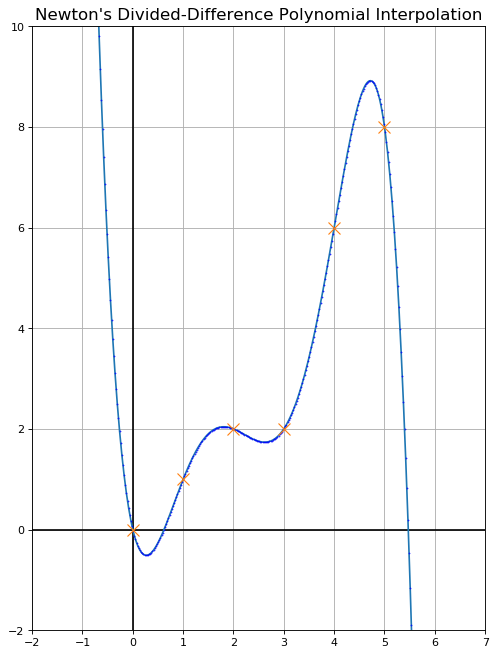

In [30]:
import matplotlib.pyplot as plt

#
# Display Graph
#

# create figure
w, h = 20, 10
fig, ax = plt.subplots(figsize=(w, h), dpi=80)

# title
title = "Newton's Divided-Difference Polynomial Interpolation"
font_size = 15
ax.set_title(title, fontsize=font_size)

# grid and axes
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

# aspec and limits
ax.set_aspect('equal') # equal
ax.set_ylim([domain[0][1],domain[1][1]]) # set y lim
ax.set_xlim([domain[0][0],domain[1][0]]) # set x lim

# plot polynomial
poly, = ax.plot(plot_xs, plot_ys, marker='.')
poly.set_markerfacecolor('None')
poly.set_markeredgecolor('b')
poly.set_markersize(1)

# plot given points in red
poly, = ax.plot(xs, ys, marker='x', markerfacecolor='r')
poly.set_linestyle('None')
poly.set_markersize(10)

# display plot
plt.show()